In [1]:
import torch
import cv2
import matplotlib.pyplot as plt

In [2]:
# GPU 사용 가능 시 GPU 사용 설정
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [3]:
# YOLOv5 모델 로드 (사전 학습된 모델 사용)
model = torch.hub.load('ultralytics/yolov5', 'yolov5x', pretrained=True, trust_repo=True)
model = model.to(device)
model.eval()

Using cache found in C:\Users\jiweo/.cache\torch\hub\ultralytics_yolov5_master


WARNING  Python>=3.10 is required, but Python==3.9.20 is currently installed 


YOLOv5  2024-10-13 Python-3.9.20 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)

Fusing layers... 
YOLOv5x summary: 444 layers, 86705005 parameters, 0 gradients, 205.5 GFLOPs
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 80, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(80, 160, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(160, 80, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(160, 80, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(160, 160, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(80, 80, kernel_size=(1, 1), stride=(1, 1

In [19]:
image_paths = ["./1.jpg", "./2.jpg", "./3.jpg"]
results = []
with torch.no_grad():
    for image_path in image_paths:
        img = cv2.imread(image_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        results.append(model(img_rgb))

C:\Users\jiweo/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\jiweo/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\jiweo/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


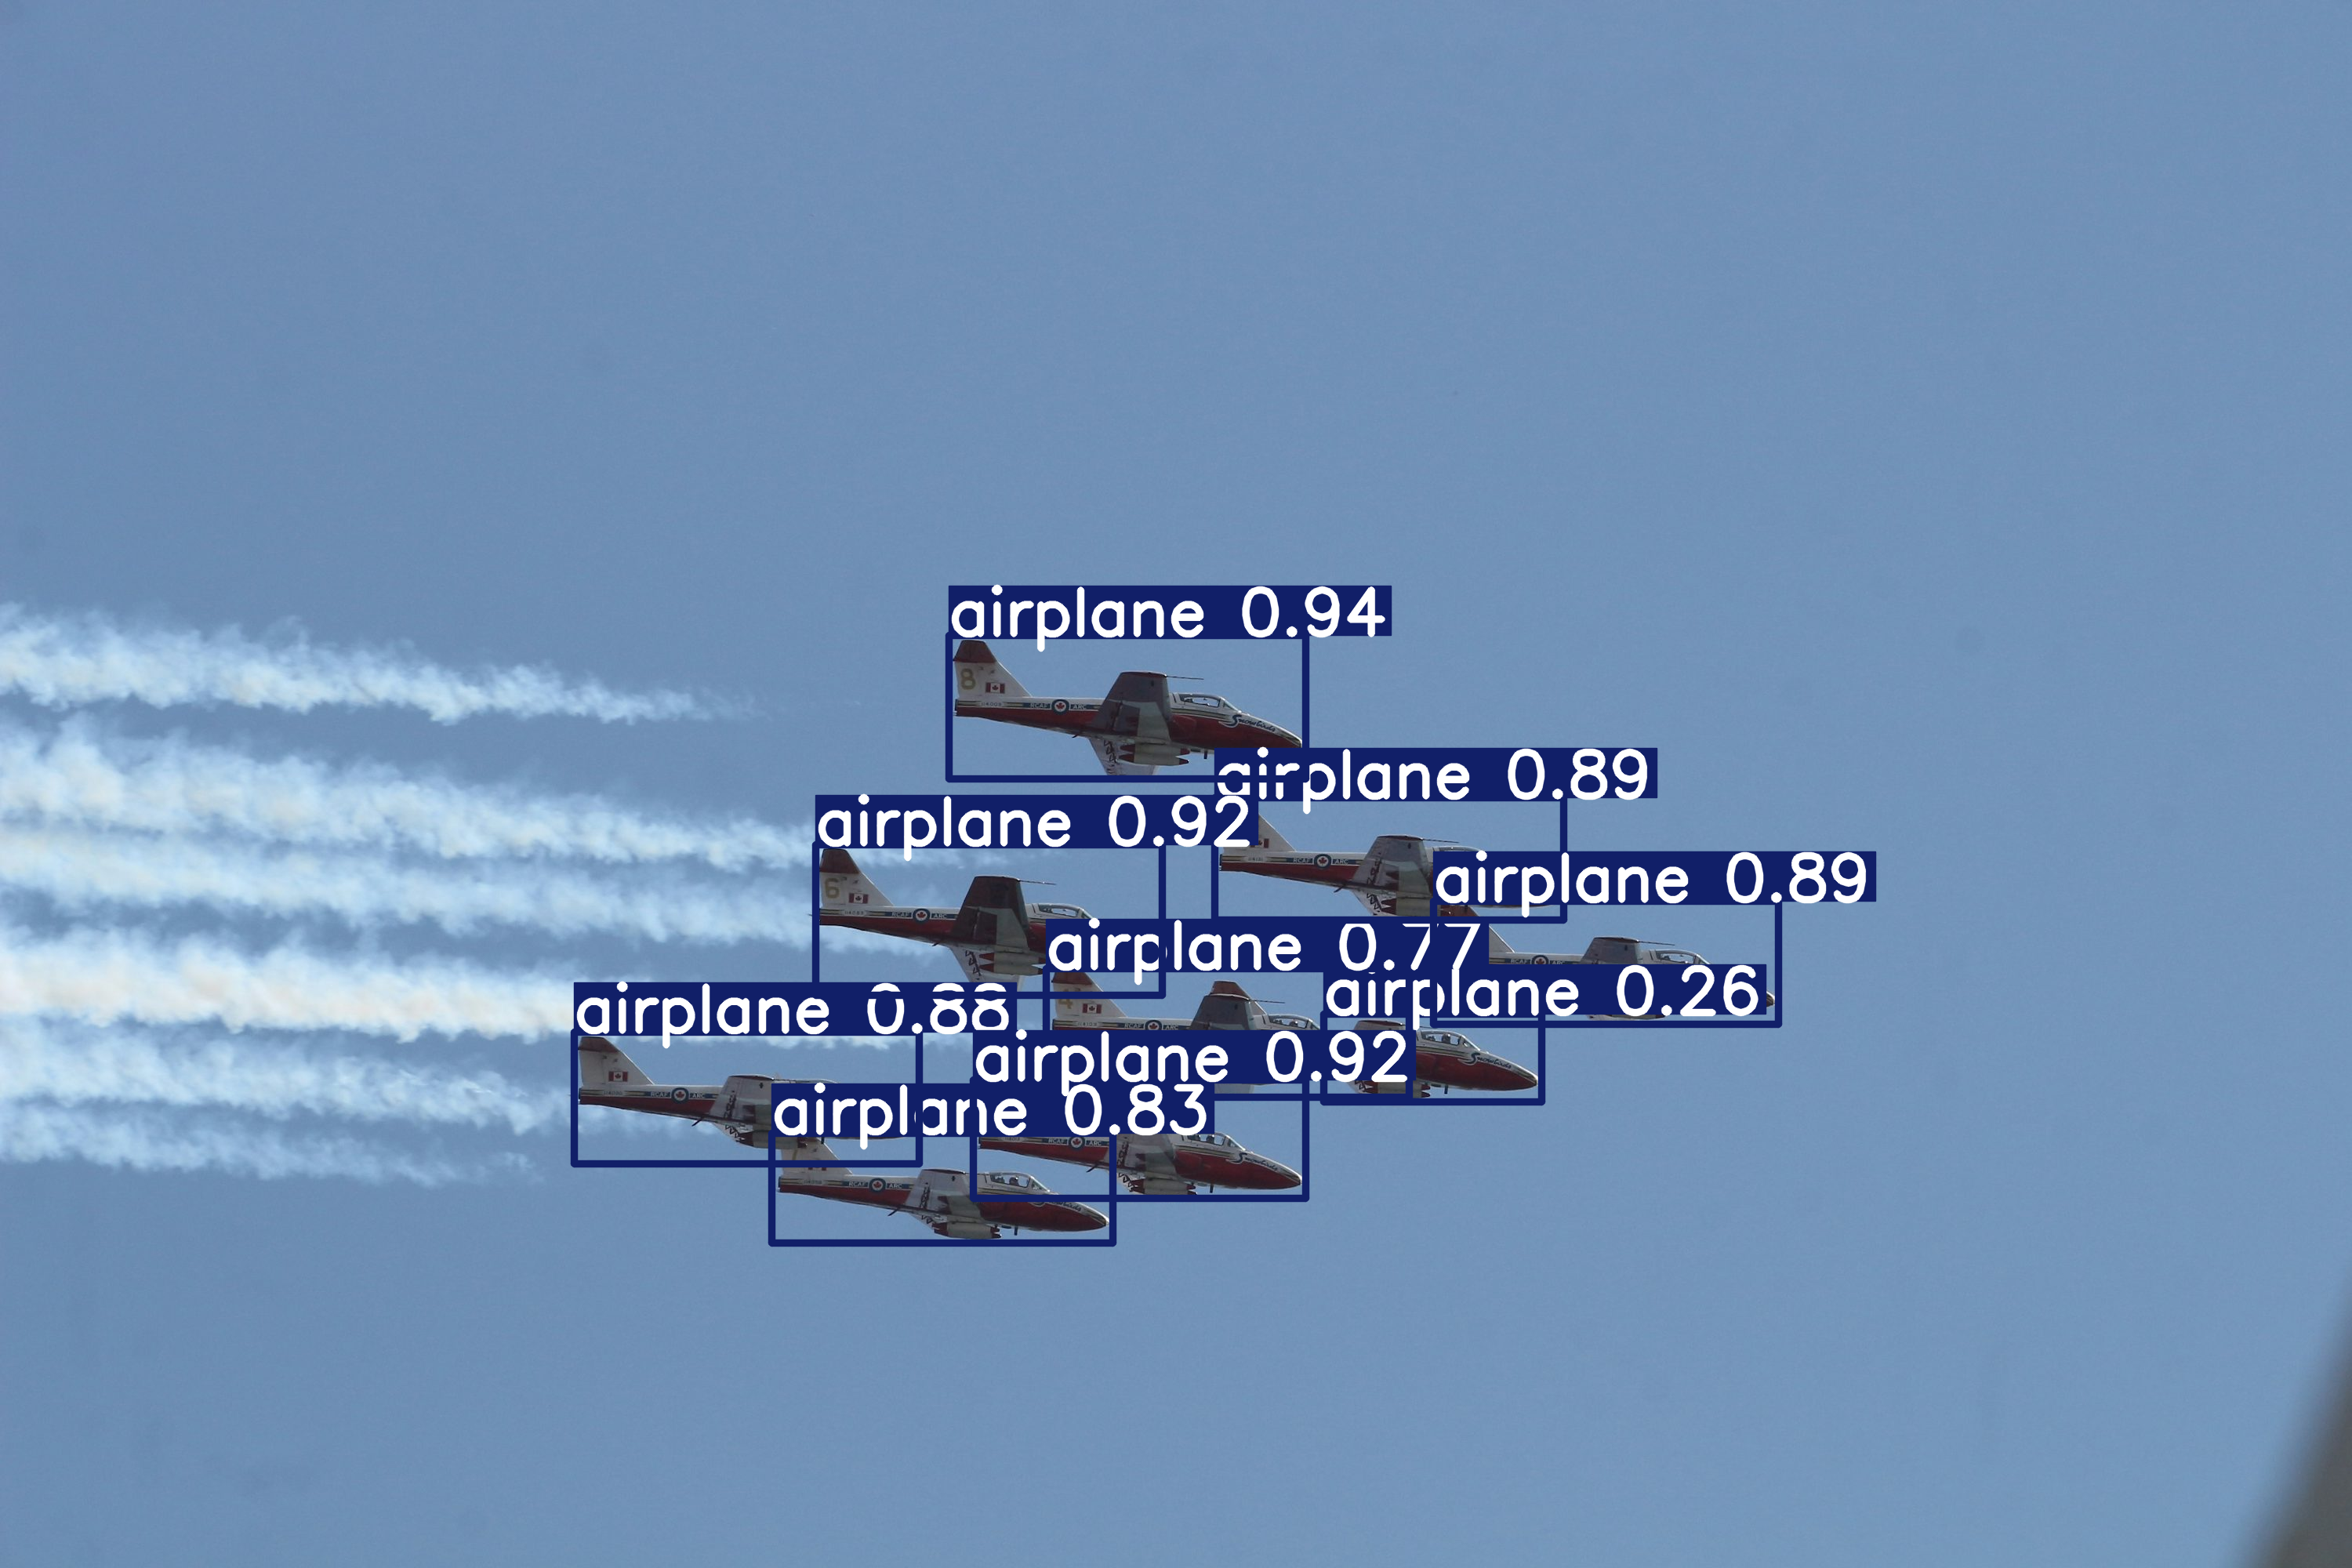

In [21]:
results[0].show()

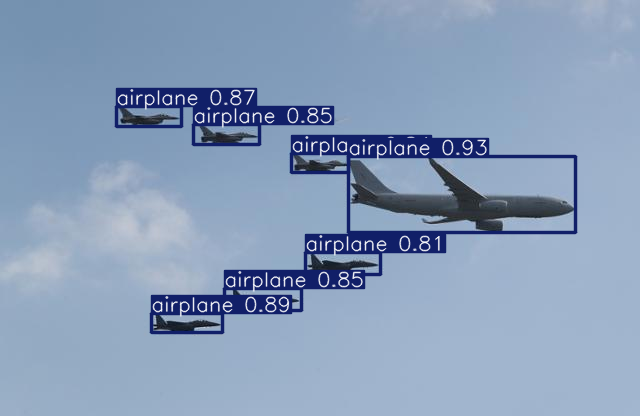

In [22]:
results[1].show()

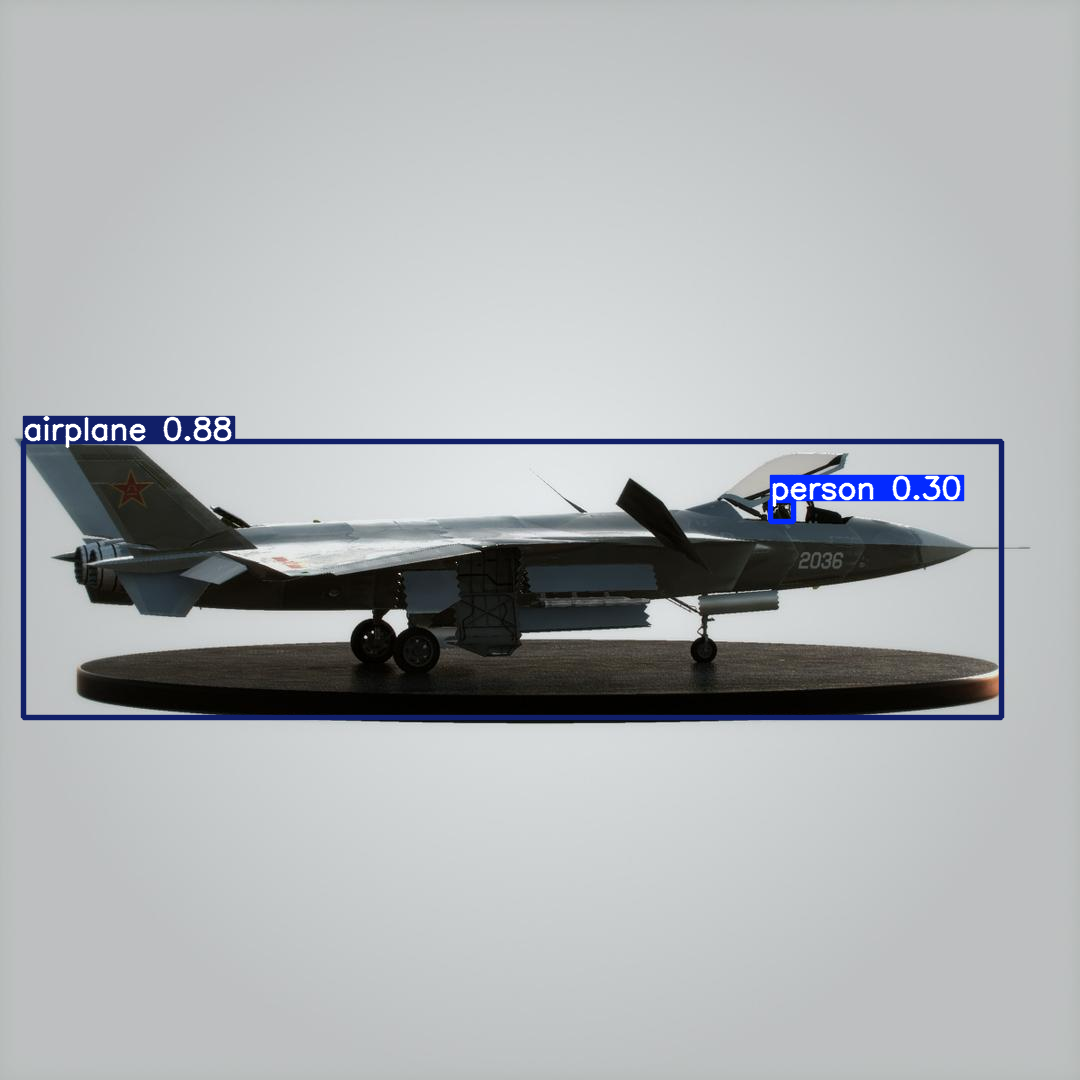

In [23]:
results[2].show()

In [12]:
df_results = results.pandas().xyxy[0]
df_results

xmin         ymin         xmax         ymax  confidence  class  \
0  1210.952515   810.976562  1665.404297   993.970276    0.935490      4   
1  1241.771973  1377.813721  1665.106689  1528.843384    0.917799      4   
2  1040.927368  1077.294434  1482.853149  1269.247681    0.915352      4   
3  1828.602539  1149.965454  2268.369141  1306.686157    0.893611      4   
4  1549.903687  1017.073730  1994.229736  1173.055298    0.891696      4   
5   732.849121  1316.754028  1172.072632  1484.513306    0.880533      4   
6   984.350098  1445.635986  1419.244141  1585.194336    0.834036      4   
7  1334.688843  1235.640991  1797.114746  1399.201416    0.772408      4   
8  1688.675171  1293.539551  1966.680786  1405.128906    0.261758      4   

       name  
0  airplane  
1  airplane  
2  airplane  
3  airplane  
4  airplane  
5  airplane  
6  airplane  
7  airplane  
8  airplane

In [13]:
filtered_results = df_results[df_results["confidence"] >= 0.5]
filtered_results

xmin         ymin         xmax         ymax  confidence  class  \
0  1210.952515   810.976562  1665.404297   993.970276    0.935490      4   
1  1241.771973  1377.813721  1665.106689  1528.843384    0.917799      4   
2  1040.927368  1077.294434  1482.853149  1269.247681    0.915352      4   
3  1828.602539  1149.965454  2268.369141  1306.686157    0.893611      4   
4  1549.903687  1017.073730  1994.229736  1173.055298    0.891696      4   
5   732.849121  1316.754028  1172.072632  1484.513306    0.880533      4   
6   984.350098  1445.635986  1419.244141  1585.194336    0.834036      4   
7  1334.688843  1235.640991  1797.114746  1399.201416    0.772408      4   

       name  
0  airplane  
1  airplane  
2  airplane  
3  airplane  
4  airplane  
5  airplane  
6  airplane  
7  airplane